In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint_arsl.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier_arsl.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier_arsl.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 47

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout (Dropout)                    │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20)                  │             860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 47)                  │             517 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,587 (6.20 KB)

 Trainable params: 1,587 (6.20 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [ ]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
21/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0147 - loss: 3.9020
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier_arsl.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 4s 34ms/step - accuracy: 0.0150 - loss: 3.9002 - val_accuracy: 0.0364 - val_loss: 3.8317
Epoch 2/1000
12/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.0408 - loss: 3.8214  
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier_arsl.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.0406 - loss: 3.8173 - val_accuracy: 0.0428 - val_loss: 3.7810
Epoch 3/1000
15/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0473 - loss: 3.7814 
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier_arsl.keras
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0479 - loss: 3.7742 - val_accuracy: 0.0632 - val_loss: 3.7212
Epoch 4/1000
15/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0600 - loss: 3.7053 
Epoch 4: saving model to model/keypoint_classifier/keypoin

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7878 - loss: 0.9248 


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
[1.8264414e-19 4.6834858e-19 2.0524950e-21 1.6318376e-18 5.7411732e-19
 2.1334325e-16 8.3714010e-22 2.7844046e-20 7.0735580e-23 4.2299571e-16
 3.9579844e-18 6.3983060e-02 3.9258443e-02 6.4341366e-01 1.8808861e-01
 5.1166352e-13 8.6701851e-29 1.0980433e-21 5.6969140e-17 3.4313905e-19
 5.0926789e-15 3.6124039e-17 2.1836871e-05 8.3974244e-17 8.4062785e-15
 1.3317611e-09 1.2568314e-08 3.5467026e-05 3.7139824e-05 1.2508990e-29
 1.4824805e-06 2.6556232e-18 1.8777004e-06 4.1141883e-20 1.7796920e-05
 1.2901742e-07 2.8419969e-10 3.0477502e-06 3.6669173e-22 8.4065618e-07
 1.7489928e-04 6.4904310e-02 8.8164753e-12 1.4802148e-19 5.7416852e-05
 2.1483651e-20 3.4576948e-20]
13


# Confusion matrix

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


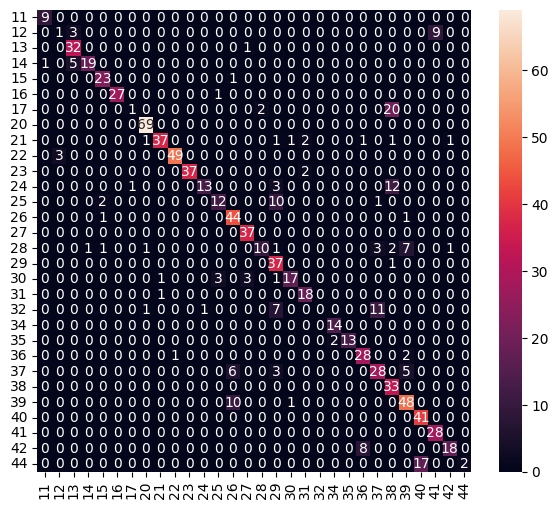

Classification Report
              precision    recall  f1-score   support

          11       0.90      1.00      0.95         9
          12       0.25      0.08      0.12        13
          13       0.80      0.97      0.88        33
          14       0.95      0.76      0.84        25
          15       0.85      0.96      0.90        24
          16       1.00      0.96      0.98        28
          17       0.50      0.04      0.08        23
          20       0.96      1.00      0.98        69
          21       0.95      0.82      0.88        45
          22       0.98      0.94      0.96        52
          23       1.00      0.95      0.97        39
          24       0.93      0.45      0.60        29
          25       0.75      0.48      0.59        25
          26       0.72      0.96      0.82        46
          27       0.90      1.00      0.95        37
          28       0.83      0.37      0.51        27
          29       0.59      0.97      0.73        38
     

C:\Users\bedo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bedo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bedo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\bedo\AppData\Local\Temp\tmp51y9u87p\assets


INFO:tensorflow:Assets written to: C:\Users\bedo\AppData\Local\Temp\tmp51y9u87p\assets


Saved artifact at 'C:\Users\bedo\AppData\Local\Temp\tmp51y9u87p'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 47), dtype=tf.float32, name=None)
Captures:
  1785249304400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1785249309392: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1785249305360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1785249310352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1785249310544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1785249306128: TensorSpec(shape=(), dtype=tf.resource, name=None)


8428

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 14 ms


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[1.8264428e-19 4.6834708e-19 2.0524809e-21 1.6318325e-18 5.7411556e-19
 2.1334260e-16 8.3713430e-22 2.7843959e-20 7.0735365e-23 4.2299444e-16
 3.9579720e-18 6.3983001e-02 3.9258361e-02 6.4341420e-01 1.8808822e-01
 5.1166195e-13 8.6701905e-29 1.0980441e-21 5.6968961e-17 3.4313796e-19
 5.0926823e-15 3.6123927e-17 2.1836806e-05 8.3973980e-17 8.4062853e-15
 1.3317570e-09 1.2568276e-08 3.5466954e-05 3.7139784e-05 1.2508999e-29
 1.4824790e-06 2.6556150e-18 1.8776983e-06 4.1141760e-20 1.7796900e-05
 1.2901741e-07 2.8419936e-10 3.0477468e-06 3.6669196e-22 8.4065448e-07
 1.7489892e-04 6.4904235e-02 8.8164658e-12 1.4802102e-19 5.7416790e-05
 2.1483666e-20 3.4576841e-20]
13
